# Анализ взаимодействия пользователей с карточками Яндекс.Дзен

Необходимо автоматизировать процесс построения отчета для менеджеров со следующими техническими условиями:
   * Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен
   * Периодичность: еженедельно
   * Пользователи: менеджеры по анализу контента
   * Состав данных для дашборда:
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - Разбивка событий по темам источников;
    - Таблица соответствия тем источников темам карточек;
   * По каким параметрам данные должны группироваться:
    - Дата и время;
    - Тема карточки;
    - Тема источника;
    - Возрастная группа;
   * Характер данных:
    - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    - Разбивка событий по темам источников — относительные величины (% событий);
    - Соответствия тем источников темам карточек - абсолютные величины;
   * Важность: все графики имеют равную важность;
   * База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД zen;
   * Частота обновления данных: один раз в сутки, в полночь по UTC;
   * Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):
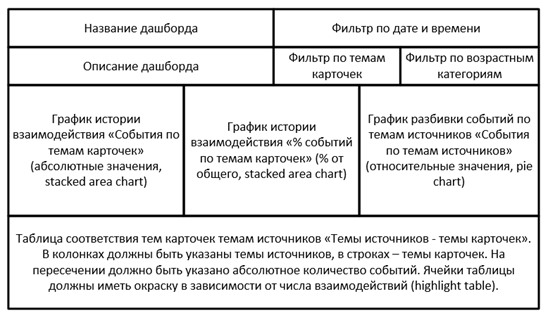

## Создание дашборда

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

In [2]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

In [3]:
def select(sql):
    return pd.io.sql.read_sql(sql, con = engine)

In [4]:
sql='''
select * from dash_visits
'''

In [5]:
df = select(sql)

In [6]:
df.to_csv('dash_visits2.csv', sep=';', index=False)

In [7]:
df.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [8]:
df['dt'].min()

Timestamp('2019-09-24 18:28:00')

In [9]:
df['dt'].max()

Timestamp('2019-09-24 19:00:00')

In [10]:
temp = df.groupby('item_topic').agg({'visits':'sum'}).reset_index()
temp['proc'] = temp['visits']/temp['visits'].sum()

In [11]:
sum(temp['visits'])

310207

In [12]:
df['visits'].sum()

310207

In [13]:
temp.sort_values(by='proc', ascending=False)

,item_topic,visits,proc
11,Наука,21736,0.070069
13,Отношения,20666,0.066620
6,Интересные факты,19942,0.064286
12,Общество,19640,0.063313
14,Подборки,17772,0.057291
19,Россия,16966,0.054693
15,Полезные советы,15435,0.049757
8,История,15389,0.049609
20,Семья,11897,0.038352
3,Женщины,11499,0.037069


## Анализ

### 1. Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?

In [14]:
temp.sort_values(by='proc', ascending=False)

,item_topic,visits,proc
11,Наука,21736,0.070069
13,Отношения,20666,0.066620
6,Интересные факты,19942,0.064286
12,Общество,19640,0.063313
14,Подборки,17772,0.057291
19,Россия,16966,0.054693
15,Полезные советы,15435,0.049757
8,История,15389,0.049609
20,Семья,11897,0.038352
3,Женщины,11499,0.037069


Всего взаимодействий за период с 24.09.2019 18:28:00 по 24.09.2019 19:00:00 пользователей с 25 темами карточек было 310207. Наиболее популярные темы карточек: Наука (21736, что составляет 7% от общего количества), Отношения (20666, что составляет 6.6%) и Интересные факты (19942, что составляет 6.4%). Самыми неинтересными темами оказались: Женская психология	(7737, 2.4%), Шоу (7511, 2.4%) и Знаменитости (7394, 2.3%).
Резое увеличение количества визитов приходится на время с 18:53 до 19:00, это может быть связанно с окончанием рабочего времени, в которое люди открывают новостную ленту, чтобы познакомиться с интересными статьями или новостями. 

### 2. Как много карточек генерируют источники с разными темами?

In [15]:
df.groupby('source_topic').agg({'visits':'sum'}).reset_index().sort_values(by='visits', ascending=False)

,source_topic,visits
20,Семейные отношения,33309
17,Россия,29831
12,Полезные советы,27412
15,Путешествия,24124
5,Знаменитости,23945
9,Кино,20084
2,Дети,15243
8,История,14628
21,Семья,13896
4,Здоровье,12831


Из источников, генерирующие карточки с разными темами, можно выявить лидеров по количеству событий: Семейные отношения (доля составляет 10.7% от количества всех визитов), Россия (9.6%) и Полезные советы (8.8%)  

### 3. Как соотносятся темы карточек и темы источников?

Наиболее часто посещаемые карточки с темой "Рассказы" от источника "Путешествия" (4587 событий), также популярна тема "Общество" источника "Россия" (3471) и тема "Наука" источника "Кино" (3279).
Если рассмотреть источники, у которых наибольшее количество популярных тем, то лидерами являются: Россия (темы: Общество, Отношения, Россия, Интересные факты и Знаменитости), Полезные советы (темы: Здоровье, Отношения, Подборки) и Путешествия (темы: История и Рассказы). 